In [42]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt

### Task 1 - Classification using the iris dataset

The iris dataset is a 'classic' machine learning sample dataset.

In [43]:
## Load the dataset from the seaborn library

import pandas as pd
import seaborn
df = seaborn.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The distibution of the three values is very similar, so no issues with ill-balance in the target


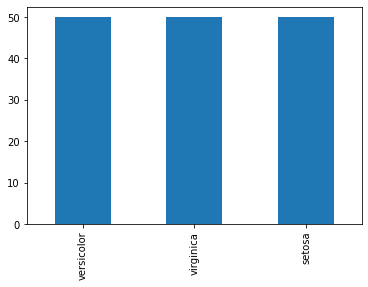

In [45]:
## Examine the distribution of the target variable, which is species
df['species'].value_counts().plot.bar()
print("The distibution of the three values is very similar, so no issues with ill-balance in the target")

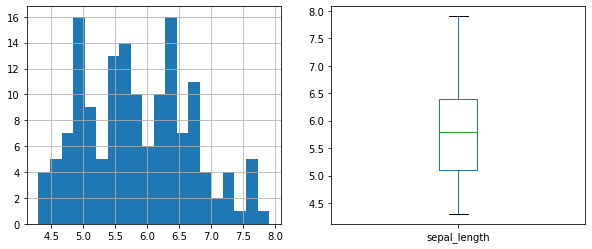

The distibution of the sepal_length is fairly symmetric, and roughly normally distributed


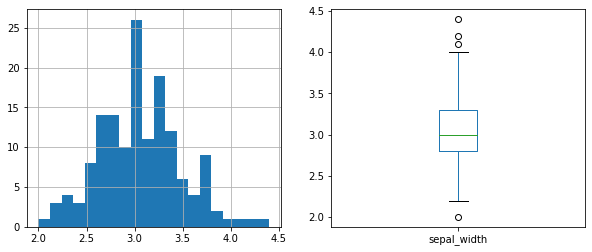

The distibution of the sepal_width is fairly symmetric, and roughly normally distributed


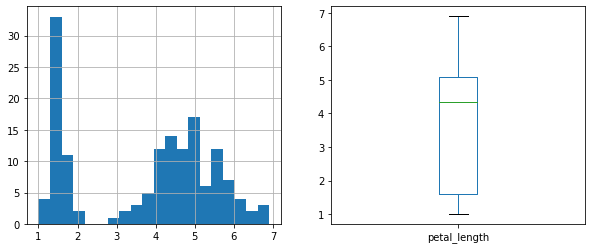

The distibution of the petal_length shows a skew, perhaps due to different types having different means


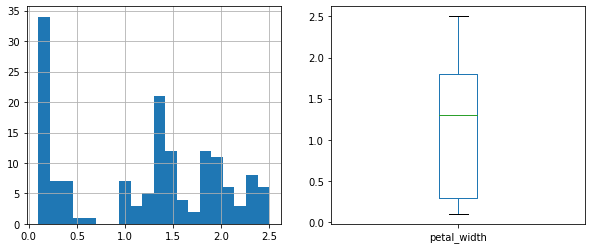

The distibution of the petal_width shows a skew, perhaps due to different types having different means


In [46]:
## Examine the distribution of the predictor variables
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df['sepal_length'].hist(bins = 20, ax = ax[0])
df['sepal_length'].plot.box(ax = ax[1])
plt.show()
print("The distibution of the sepal_length is fairly symmetric, and roughly normally distributed")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df['sepal_width'].hist(bins = 20, ax = ax[0])
df['sepal_width'].plot.box(ax = ax[1])
plt.show()
print("The distibution of the sepal_width is fairly symmetric, and roughly normally distributed")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df['petal_length'].hist(bins = 20, ax = ax[0])
df['petal_length'].plot.box(ax = ax[1])
plt.show()
print("The distibution of the petal_length shows a skew, perhaps due to different types having different means")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df['petal_width'].hist(bins = 20, ax = ax[0])
df['petal_width'].plot.box(ax = ax[1])
plt.show()
print("The distibution of the petal_width shows a skew, perhaps due to different types having different means")


Because of the difference in ranges and means of the numerical data, some normalisation or standardisation is recommended when applying techniques such as k-NN (which are distance based).

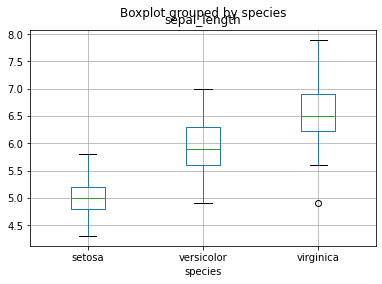

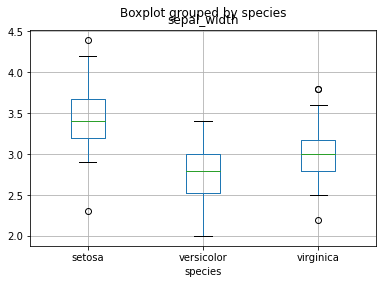

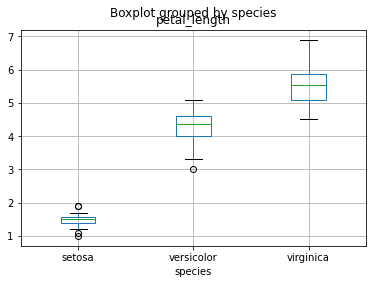

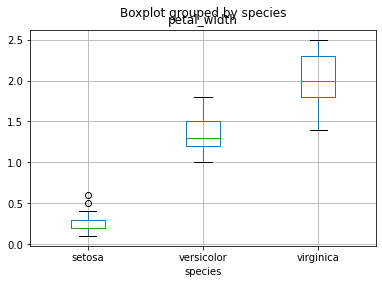

Physical measurements do seem to be influenced by the species


In [47]:
df.boxplot('sepal_length', by = 'species')
plt.show()
df.boxplot('sepal_width', by = 'species')
plt.show()
df.boxplot('petal_length', by = 'species')
plt.show()
df.boxplot('petal_width', by = 'species')
plt.show()
print("Physical measurements do seem to be influenced by the species")

In [48]:
import pandas as pd
import seaborn
df = seaborn.load_dataset("iris")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
tree = DecisionTreeClassifier(max_depth = 4, criterion = 'gini')
# tree = DecisionTreeClassifier()

y = df['species']
X = df.drop(columns = ['species'])
X = pd.get_dummies(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=42)

model = tree.fit(Xtrain,ytrain)

## Test on the test-set which model has not seen
y_pred = model.predict(Xtest)

import sklearn.metrics as metrics
print("decision tree")
print("accuracy(test) = ", metrics.accuracy_score(ytest, y_pred))
print("CM(test) = \n", metrics.confusion_matrix(ytest, y_pred))

decision tree
accuracy(test) =  0.9466666666666667
CM(test) = 
 [[29  0  0]
 [ 0 23  0]
 [ 0  4 19]]


training:testing : Accuracy (gini) : Accuracy (entropy) 
90:10 : 100% : 100%

70:30 : 100% : 100%

60:40 : 96.7% : 98.3%

50:50 : 90.7% : 92%

40:60 : 96.7% : 96.7%

30:70 : 92.3% : 92.4%

More training data generally leads to better (i.e. more accurate) models. 
But it's important to reserve a large enough test set of unseen data.
In this dataset (where there are n=150 rows) it's hard to achieve a perfect balance, and more sophisticated approaches such as cross-validation might be advised (See topic 8)

Limiting the max_depth in this example to 2 or 3 will reduce the complexity of the model, and limit the accuracy achievable on the training set, but with the benefit of not overfitting to the random variations in the training set. e.g. At a 50:50 train:test split, max_depth =2 gave 86.7% accuracy, but max_depth = 3 gave 97.3% or 98.7% accuracy accuracy on the test set (depending on criteria used). So limiting tree depth can be of benefit (max_depth to use will depend on the dataset, so is a matter of experimentation)

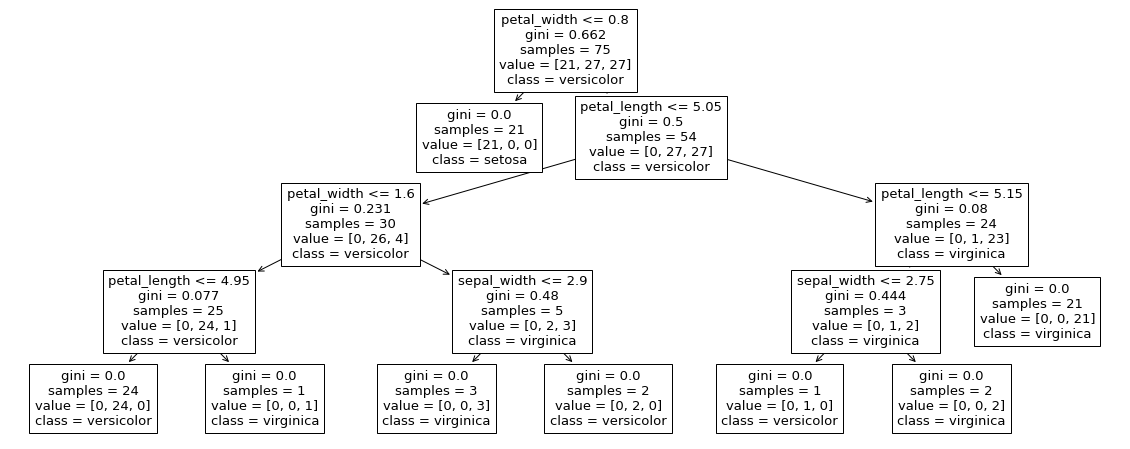

In [49]:
from sklearn import tree
plt.figure(figsize = (20,8))
tree.plot_tree(model, feature_names = X.columns, class_names = y.unique() )
plt.show()

In [50]:
## Apply k-Nearest Neighbours model with no preprocessing
df = seaborn.load_dataset("iris")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier()

y = df['species']
X = df.drop(columns = ['species'])

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=42)

kNNmodel = knn.fit(Xtrain,ytrain)
y_pred = kNNmodel.predict(Xtest)

print("kNN")
print("accuracy(test) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix(test) = \n", metrics.confusion_matrix(ytest, y_pred))

kNN
accuracy(test) =  0.9466666666666667
Confusion Matrix(test) = 
 [[29  0  0]
 [ 0 23  0]
 [ 0  4 19]]


In [51]:
## Apply k-Nearest Neighbours model with normalisation as preprocessing
df = seaborn.load_dataset("iris")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# knn = KNeighborsClassifier() ### default is 5 neighbours 
knn = KNeighborsClassifier(n_neighbors = 3) ### trying a few values of n_neighbors n = 3 seems best

y = df['species']
X = df.drop(columns = ['species'])

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
Xnorm = scaler.fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xnorm, y, test_size=0.5, random_state=42)

kNNmodel = knn.fit(Xtrain,ytrain)
y_pred = kNNmodel.predict(Xtest)

print("kNN with normalised predictors")
print("accuracy(test) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix(test) = \n", metrics.confusion_matrix(ytest, y_pred))

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Xstd = scaler.fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xstd, y, test_size=0.5, random_state=42)

kNNmodel = knn.fit(Xtrain,ytrain)
y_pred = kNNmodel.predict(Xtest)

print("kNN with standardised predictors")
print("accuracy(test) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix(test) = \n", metrics.confusion_matrix(ytest, y_pred))

kNN with normalised predictors
accuracy(test) =  0.9866666666666667
Confusion Matrix(test) = 
 [[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]
kNN with standardised predictors
accuracy(test) =  0.9733333333333334
Confusion Matrix(test) = 
 [[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]


Same data, same train-test split, will have higher accuracy when either standardised or normalised. In this case normalising seems to have the greatest benefit

### Task 2 - Classification using the heart.csv dataset

The heart dataset has a binary target names disease. It has a combination of categorical and numerical predictors.
It also has some missing data which we will have to remove befor performing analysis

In [52]:
### Load the dataset (change path to match file location on your own machine)
heart = pd.read_csv("C:/Data/heart.csv")

heart.isna().value_counts() ### may not work if you hve an older version of pandas installed

## we can see missing data in ca, thal and disease columns

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   disease
False  False  False  False     False  False  False    False    False  False    False  False  False  False      296
                                                                                      True   False  False        5
                                                                                      False  True   False        2
dtype: int64

In [53]:
heart = heart.dropna() ## remove rows with missing data

heart.isna().value_counts() ### may not work if you hve an older version of pandas installed

## check now shows no missing data

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   disease
False  False  False  False     False  False  False    False    False  False    False  False  False  False      296
dtype: int64

In [54]:
### Train and test on entire dataset: this will likely appear to give very good results

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn import preprocessing

y = heart['disease']
X = heart.drop(columns = ['disease'])

## One-hot encode the categorical predictors
X = pd.get_dummies(X, drop_first = True)
X = pd.get_dummies(X)

tree = DecisionTreeClassifier()
Treemodel = tree.fit(X,y) ; 
y_pred = Treemodel.predict(X)
print("decision tree")
print("accuracy (on training set) = ", metrics.accuracy_score(y, y_pred))
print("Confusion Matrix = \n", metrics.confusion_matrix(y, y_pred))

knn = KNeighborsClassifier()
scaler = preprocessing.StandardScaler() ### kNN likes standardised or nornmalised data
Xstd = scaler.fit_transform(X)
kNNmodel = knn.fit(Xstd,y)
y_pred = kNNmodel.predict(Xstd)
print("kNN")
print("accuracy (on training set) = ", metrics.accuracy_score(y, y_pred))
print("Confusion Matrix = \n", metrics.confusion_matrix(y, y_pred))

rf = RandomForestClassifier()
rfmodel = rf.fit(X,y)
y_pred = rfmodel.predict(X)
print("RF")
print("accuracy (on training set) = ", metrics.accuracy_score(y, y_pred))
print("Confusion Matrix = \n", metrics.confusion_matrix(y, y_pred))

print("\n\nAs expected models perform very well on data on which they were trained, but thats not a fair evaluation")

decision tree
accuracy (on training set) =  1.0
Confusion Matrix = 
 [[160   0]
 [  0 136]]
kNN
accuracy (on training set) =  0.8817567567567568
Confusion Matrix = 
 [[145  15]
 [ 20 116]]
RF
accuracy (on training set) =  1.0
Confusion Matrix = 
 [[160   0]
 [  0 136]]


As expected models perform very well on data on which they were trained, but thats not a fair evaluation


In [55]:
### Train on one subset of data, test on another to provide fair evaluation

y = heart['disease']
X = heart.drop(columns = ['disease'])

X = pd.get_dummies(X, drop_first = True)
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

## One-hot encode the categorical predictors
X = pd.get_dummies(X, drop_first = True)
X = pd.get_dummies(X)

tree = DecisionTreeClassifier()
Treemodel = tree.fit(Xtrain,ytrain) ; 
y_pred = Treemodel.predict(Xtest)
print("decision tree")
print("accuracy (on test set) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix = \n", metrics.confusion_matrix(ytest, y_pred))

knn = KNeighborsClassifier()
scaler = preprocessing.StandardScaler() ### kNN likes standardised or nornmalised data
Xtrain_std = scaler.fit_transform(Xtrain)
Xtest_std = scaler.fit_transform(Xtest)
kNNmodel = knn.fit(Xtrain_std,ytrain)
y_pred = kNNmodel.predict(Xtest_std)
print("kNN")
print("accuracy (on test set) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix = \n", metrics.confusion_matrix(ytest, y_pred))

rf = RandomForestClassifier()
rfmodel = rf.fit(Xtrain,ytrain)
y_pred = rfmodel.predict(Xtest)
print("RF")
print("accuracy (on test set) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix = \n", metrics.confusion_matrix(ytest, y_pred))

print("\n\nLess accurate when tested on test set (i.e. unseen data) but acmore realistic measure of accuracy")

decision tree
accuracy (on test set) =  0.7567567567567568
Confusion Matrix = 
 [[33 11]
 [ 7 23]]
kNN
accuracy (on test set) =  0.8648648648648649
Confusion Matrix = 
 [[38  6]
 [ 4 26]]
RF
accuracy (on test set) =  0.7972972972972973
Confusion Matrix = 
 [[36  8]
 [ 7 23]]


Less accurate when tested on test set (i.e. unseen data) but acmore realistic measure of accuracy


### Task 3 - Classification using the fifa.csv dataset

Our old favorite data, the fifa dataset. This time we shall have to be selective about how many variables to use.

In [58]:
fifa = pd.read_csv("C:/Data/fifa.csv")
fifa = fifa.dropna()
fifa.head()

,ID,Name,Nationality,Age,OverallRating,Club,HeightCM,HeightFtIn,WeightKg,WeightSt,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,Sliding Tackle
0,230212,A. Benjamin Chiamuloira Paes,Brazil,31,79,Internacional,182,"6'0""",79.4,12st 6lb,...,51,88,77,24,47,66,70,81,78,81
1,248767,A. Pimenta Flora Pimenta,Portugal,20,53,Venezia FC,184,"6'0""",75.3,11st 11lb,...,42,40,23,43,51,53,50,22,25,28
2,190883,A.J. DeLaGarza,Guam,31,66,Houston Dynamo,174,"5'9""",68.1,10st 10lb,...,36,71,66,55,56,52,64,64,62,63
3,234290,Aapo Halme,Finland,21,63,Barnsley,197,"6'5""",77.7,12st 4lb,...,18,62,57,27,32,31,62,58,61,57
4,203504,Aaron Amadi-Holloway,Wales,26,61,Brisbane Roar,189,"6'2""",83.3,13st 1lb,...,49,58,48,56,46,59,51,32,52,48


In [59]:
### If planning to predict IntRep, which factors influence it most strongly
fifa.corrwith(fifa['IntlRep']).sort_values()

ID                 -0.359828
SprintSpeed         0.027418
Acceleration        0.029857
HeightCM            0.033666
Balance             0.045638
Sliding Tackle      0.075945
Stamina             0.080963
Agility             0.089311
StandingTackle      0.089717
WeightKg            0.090624
Jumping             0.115086
Marking             0.116400
Strength            0.125567
Interceptions       0.126196
WeakFoot            0.127218
HeadingAccuracy     0.153117
Dribbling           0.170144
Finishing           0.172327
Aggression          0.173350
Positioning         0.175953
Crossing            0.183517
LongShots           0.205947
BallControl         0.210021
Penalties           0.210929
FreeKickAccuracy    0.214659
Curve               0.222234
LongPassing         0.235110
Volleys             0.235188
ShortPassing        0.236334
Age                 0.256816
Vision              0.280475
ShotPower           0.283326
Composure           0.374329
Reactions           0.426362
OverallRating 

wageEuro and valueEuro are srongly correlated with IntlRep, but we would probably judge that these were consequences rather than predictors of reputation. So ignore tham, and assume that OverallRating, Reactions,Compusure, ShotPower and Vision might be the best predictors, as these have the strongest correleation to IntlRep

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

y = fifa['IntlRep']##.astype('str')
X = fifa[['Composure','Finishing','Vision','ShotPower','OverallRating','Reactions']]

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier()
model = tree.fit(Xtrain,ytrain) ; 
y_pred = model.predict(Xtest)
print("decision tree")
print("accuracy(on test set) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix = \n ", metrics.confusion_matrix(ytest, y_pred))

knn = KNeighborsClassifier()
kNNmodel = knn.fit(Xtrain,ytrain)
y_pred = kNNmodel.predict(Xtest)
print("kNN")
print("accuracy(on test set) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix = \n", metrics.confusion_matrix(ytest, y_pred))

rf = RandomForestClassifier()
rfmodel = rf.fit(Xtrain,ytrain)
y_pred = rfmodel.predict(Xtest)
print("Random Forest")
print("accuracy(on test set) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix = \n", metrics.confusion_matrix(ytest, y_pred))


decision tree
accuracy(on test set) =  0.8947799945340257
Confusion Matrix = 
  [[3190  163   13    2    0]
 [ 143   61   16    1    0]
 [  15   22   18    0    0]
 [   0    2    6    4    1]
 [   0    0    1    0    1]]
kNN
accuracy(on test set) =  0.9177370866356929
Confusion Matrix = 
 [[3311   55    2    0    0]
 [ 175   34   12    0    0]
 [  20   23   12    0    0]
 [   1    4    7    1    0]
 [   0    0    1    1    0]]
Random Forest
accuracy(on test set) =  0.9253894506695819
Confusion Matrix = 
 [[3319   45    4    0    0]
 [ 165   46   10    0    0]
 [  18   19   18    0    0]
 [   0    1    8    3    1]
 [   0    0    0    2    0]]


Quite good predictions if judging on overall prediction accuracy. But that is misleading!

But note that there are much larger error rates in higher IntlRep levels.
This is because most players are IntlRep level 1, so the model is trained in data that is mostly of that class so has increasingly limited experience of what to look for at higher levels (since they are rarer).

This is a common problem wih balanced datasets. We can see the imbalance referred to. A model needs sufficient examples to train on. A solution to this would be more advanced sampling techniques, where we could over-sample the rare cases, or under-sample the majority case, so that there was a balance between numbers in each classification level.


1    0.920835
2    0.060576
3    0.015636
4    0.002624
5    0.000328
Name: IntlRep, dtype: float64


<AxesSubplot:>

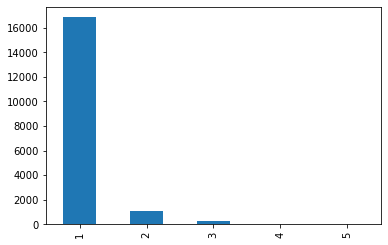

In [64]:
print(fifa['IntlRep'].value_counts() / len(fifa))
print("92% of players are IntlRep = 1, so classifier could achieve 92% accuracy just by saying all players were Rep level 1")
fifa['IntlRep'].value_counts().plot.bar()